In [1]:
from sage.all import *

In [3]:
p_norm(25)

1/25

In [2]:
p_adic_type = sage.rings.padics.padic_capped_relative_element.pAdicCappedRelativeElement

p = 5
Q_5 = Qp(p)

j = Q_5(-1).sqrt()

Qi_to_Q5 = lambda x: Q_5(x.real()) + Q_5(x.imag()) * j

p_val = lambda a: Q_5(a).valuation()
p_norm = lambda a: p ** -p_val(a)

def get_rep(M):
    (a, b), (c, d) = M
    a, b, c, d = [Qi_to_Q5(x) if type(x) != p_adic_type else x for x in
                  [a, b, c, d]]
    if d.valuation() > c.valuation():
        a, b, c, d = b, a, d, c

    M = Matrix([[a, b], [c, d]])

    make_upper_triangular = Matrix([[1, 0], [-c / d, 1]])
    M *= make_upper_triangular

    u0, u1 = [1 / (M[i, i] * p_norm(M[i, i])) for i in [0, 1]]
    invert_diag = Matrix([[u0, 0], [0, u1]])
    M *= invert_diag

    M[0, 1] = QQ(M[0, 1] % M[0, 0])

    max_p = max(
        p_norm(M[i, j]) for i in range(2) for j in range(2) if M[i, j] != 0)
    M *= max_p

    M = Matrix([[QQ(M[i, j]) for j in range(2)] for i in range(2)])
    return M


In [2]:
from IPython.display import display, Markdown
N=100

def display_p_adic(j):
    j = Qi_to_Q5(j)
    j_str = str(j).replace('*','\\cdot')
    for i in range(N,1,-1):
        j_str = j_str.replace(f'^{i}',f'^{{{i}}}') 
    display(Markdown(rf"""$$ {j_str} $$ """))

display_p_adic(I)

$$ 2 + 5 + 2\cdot5^{2} + 5^{3} + 3\cdot5^{4} + 4\cdot5^{5} + 2\cdot5^{6} + 3\cdot5^{7} + 3\cdot5^{9} + 2\cdot5^{10} + 2\cdot5^{11} + 4\cdot5^{13} + 5^{14} + 3\cdot5^{15} + 2\cdot5^{16} + 4\cdot5^{17} + 4\cdot5^{19} + O(5^{20}) $$ 

In [3]:
U_0 = Matrix(2, [1, 0, 0, i])
U_1 = Matrix(2, [i, 0, 0, 1])

T_0 = Matrix(2, [2 - i, 0, 0, 2 + i])
T_inf = Matrix(2, [2 + i, 0, 0, 2 - i])
T_1 = Matrix(2, [1, 2 + 2 * i, i - 1, 1])
T_2 = Matrix(2, [1, -2 + 2 * i, i + 1, 1])
T_3 = Matrix(2, [1, 2 - 2 * i, -i - 1, 1])
T_4 = Matrix(2, [1, -2 - 2 * i, -i + 1, 1])

unitaries = [T_0, T_1, T_2, T_3, T_4, T_inf]
reps = [get_rep(U) for U in unitaries]

# inv = Matrix(2,[0,1,1,0])
unitaries = [U_0, U_1] + unitaries

In [4]:
rep_val = lambda A: p_val(det(get_rep(A)))
edge_orbits = {}

for vertex,n_list in neighbors.items():
    for neighbor in n_list:
        edge = (immutabilize(vertex),immutabilize(neighbor))
        edge_orbits[edge] = []
        for U in unitaries:
            if rep_val(U*neighbor)<=n:
                edge_after_action = (immutabilize(get_rep(U*vertex)),immutabilize(get_rep(U*neighbor)))
                edge_orbits[edge].append(edge_after_action)

NameError: name 'neighbors' is not defined

In [68]:
edge_val_det = lambda edge:(rep_val(edge[0]),rep_val(edge[1]))

edge_action_graph = Graph(edge_orbits)
len(edge_action_graph.connected_components())

3

In [69]:
edge_colors = {edge:edge_val_det(edge) for edge in edge_action_graph.vertices()}
colors_partition = {}
for k,v in edge_colors.items():
    if v not in colors_partition.keys():
        colors_partition[v]=[]
    colors_partition[v].append(k)

edge_partition = list(colors_partition.values())

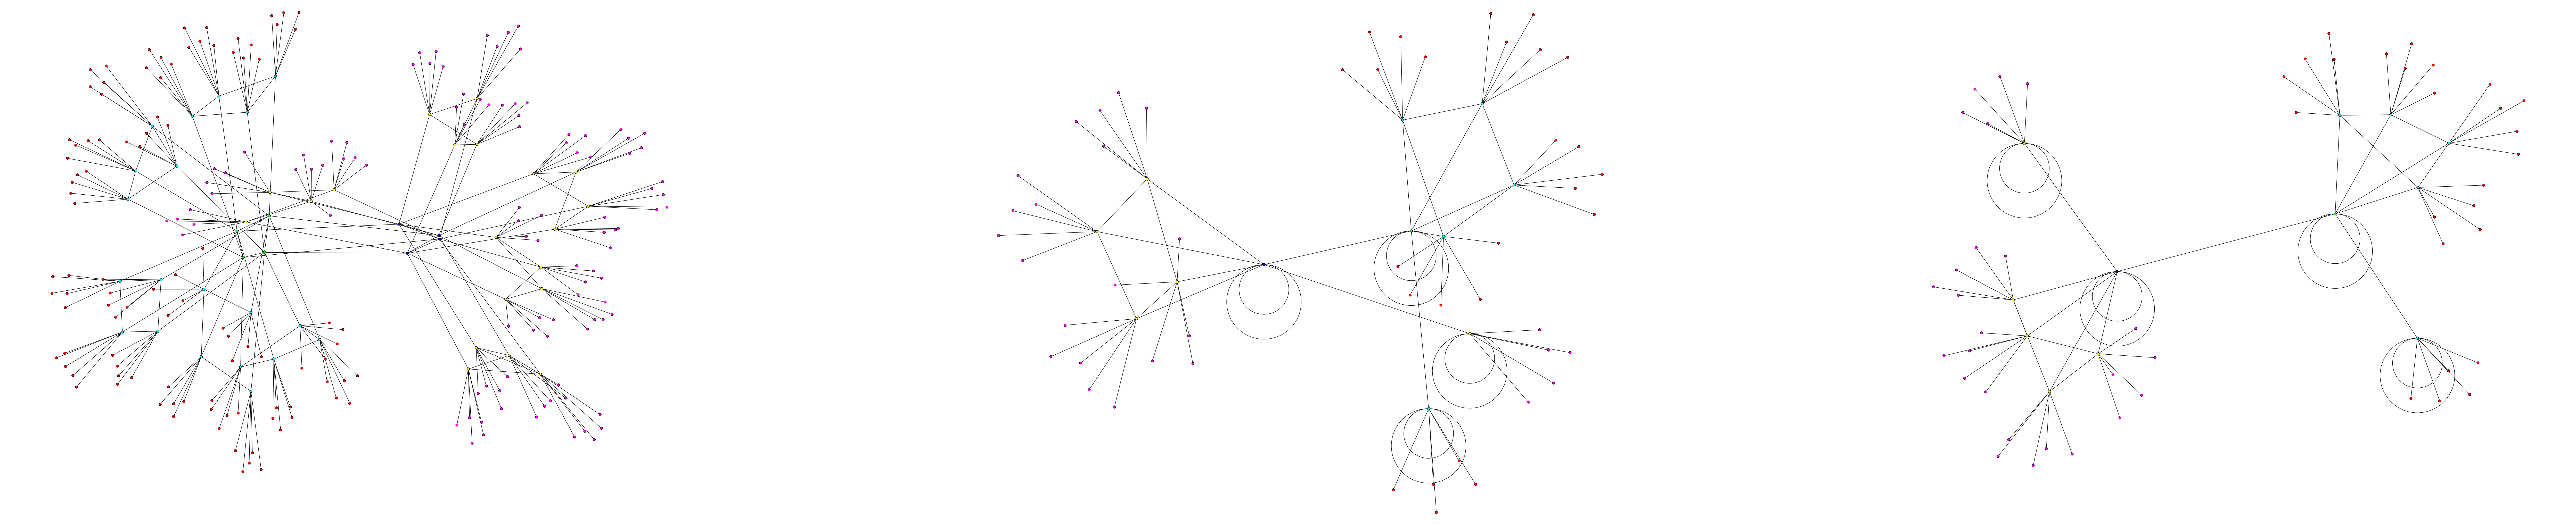

In [70]:
edge_action_graph.show(vertex_labels=False,vertex_size=50,partition=edge_partition,figsize=(100,100))

## find elements which invert edges

$$ x.(v,gv)=(gv,v)$$
$$ xv=gv  \Rightarrow x \in gK $$
$$ xgv=v  \Rightarrow x \in Kg^{-1} $$

In [5]:
K = [Matrix(2,[e,0,0,d]) for e in [1,-1,I,-I] for d in [1,-1,I,-I]]
G_1 = [Matrix(2,[I,0,0,I])^n for n in range(4)]


In [6]:
H5 = Matrix(2,[1,0,0,5])
B = Matrix(2,[-4+2*I,-5,I,2-4*I])
Ap = 5*T_0^-1*B
Ap

[      -10 -5*I - 10]
[  2*I + 1     -10*I]

In [7]:
get_rep(Ap)

[5 1]
[0 1]

In [10]:
j

2 + 5 + 2*5^2 + 5^3 + 3*5^4 + 4*5^5 + 2*5^6 + 3*5^7 + 3*5^9 + 2*5^10 + 2*5^11 + 4*5^13 + 5^14 + 3*5^15 + 2*5^16 + 4*5^17 + 4*5^19 + O(5^20)

In [16]:
Ap/(2-I)

[-2*I - 4 -4*I - 3]
[       I -4*I + 2]

In [53]:
distance(Ap)

1

In [8]:
Ap.C.T*H5*Ap

[125   0]
[  0 625]

In [ ]:
get_rep(B)

In [ ]:
Ap.C.T*H5*Ap

In [263]:
distance = lambda A: p_val(Qi_to_Q5(det(A))) - 2*min(p_val(Qi_to_Q5(A[i,j])) for i in range(2) for j in range(2))

In [11]:
def gK_cap_Kg_inv(g):
    gK = {immutabilize(g*k) for k in K}
    Kg_inv = {immutabilize(5*k*g^-1) for k in K}
    return gK&Kg_inv

In [136]:
gK_cap_Kg_inv(T_1)

NameError: name 'gK_cap_Kg_inv' is not defined

In [13]:
A = Matrix(2,[-1,2*I+2,-I+1,1])
display((Id,reps[1]))
get_rep(A),get_rep(A*reps[1])

(
[1 0]  [5 1]
[0 1], [0 1]
)

(
[5 1]  [1 0]
[0 1], [0 1]
)

# First non transitive form

####
$ 
H = \begin{bmatrix}1\\  & n \end{bmatrix}
$

$
A^*HA=p^k H $

$
x^2+y^2+n(z^2+w^2)=p
$

In [14]:
[get_rep(U_1**i*Matrix(2,[25,3,0,1])) for i in range(4)]

[
[25  3]  [25 21]  [25 22]  [25  4]
[ 0  1], [ 0  1], [ 0  1], [ 0  1]
]

In [137]:
Q = Matrix(2,[7+8*I,-6-6*I,I+1,8+7*I])
get_rep(Q*reps[1])

[25 11]
[ 0  1]

In [27]:
from itertools import product
from math import isqrt

def sum_of_squares(n):
    """Returns list of (x, y) such that x^2 + y^2 = n"""
    result = []
    for x in range(0, isqrt(n) + 1):
        y2 = n - x*x
        y = isqrt(y2)
        if y*y == y2:
            # Add all 4 symmetric versions
            result.append((x, y))
            if y != 0:
                result.append((x, -y))
            if x != 0:
                result.append((-x, y))
                if y != 0:
                    result.append((-x, -y))
    return result

def solve_general(n, q):
    """Find all integer solutions to x^2 + y^2 + n*(z^2 + w^2) = q when q=5^k"""
    solutions = []
    for B in range(0, q // n + 1):
        A = q - n * B
        if A < 0:
            continue
        xy_pairs = sum_of_squares(A)
        zw_pairs = sum_of_squares(B)
        for x, y in xy_pairs:
            for z, w in zw_pairs:
                solutions.append((x, y, z, w))
    return solutions
    
n=6
H = Matrix(2,[1,0,0,n])
def unitary_condition(A):
    return A.C.T * H*A

def make_unitary(x,y,z,w,t=1):
    a = x+I*y
    b=z+I*w
    A = Matrix(2,[a,n*b,-t*b.conjugate(),t*a.conjugate()])
    return A


In [28]:
def dict_list_add(dic,key,val):
    if key not in dic.keys():
        dic[key] = []
    dic[key].append(val)

In [29]:
# reps_classes = set()
im_rep = lambda A: immutabilize(get_rep(A))
def nothing(arg=None):
    return
    
to_print = True
cond_print = print if to_print else nothing

rep1_stab = set() # if get_rep(A*reps[1])==reps[1]
rep1 = Matrix(2,[5,1,0,1])
                  
from_v0 = {} # orbit of the origin
from_v1 = {} # orbit of reps[1] [5 1] [0 1] 
for i in range(5):
    q=p**i
    solutions = solve_general(n,q)
    # counter = 0
    for sol in solutions:
        # cond_print('a={0},b={1},c={2},d={3}'.format(*sol))
        for t in [1,-1,I,-I]:
            A = make_unitary(*sol,t=t)
            dict_list_add(from_v0 ,im_rep(A), A)
            dict_list_add(from_v1 ,im_rep(A*reps[1]) , A)
            if get_rep(A*rep1)==rep1:
                rep1_stab.add(immutabilize(A))
            # R = im_rep(A)
            # cond_print(f'{counter}.')
            # counter+=1
            # cond_print(A)
            # cond_print()
            # assert unitary_condition(A)==q*H
            # cond_print(R)
    
            # reps_classes.add(R)
            # cond_print('---')

In [313]:
[get_rep(U_0**i * Matrix(2,[25,11,0,1])) for i in range(4)]

[
[25 11]  [25 23]  [25 14]  [25  2]
[ 0  1], [ 0  1], [ 0  1], [ 0  1]
]

In [19]:
BB

[ 2*I - 3 -6*I + 6]
[   I - 1  3*I - 2]

In [30]:
def div_max_pow(A):
    m = min(p_val(A[i,j]) for i in range(2) for j in range(2) if A[i,j]!=0)
    return immutabilize(1/5**m* A)

BB = Matrix(2,[-3+2*I, 6-6*I, -1+I,-2+3*I])
rep1_stab# & {immutabilize(k*B) for k in K}

{[-25   0]
 [  0 -25],
 [-10*I - 15 -30*I - 30]
 [   5*I + 5 -15*I - 10],
 [ 10*I - 15 -30*I + 30]
 [   5*I - 5  15*I - 10],
 [-15*I - 10  30*I + 30]
 [  -5*I - 5 -10*I - 15],
 [15*I - 10 30*I - 30]
 [ -5*I + 5 10*I - 15],
 [   -5 -60*I]
 [ 10*I     5],
 [-5  0]
 [ 0 -5],
 [-2*I - 3 -6*I - 6]
 [   I + 1 -3*I - 2],
 [ 2*I - 3 -6*I + 6]
 [   I - 1  3*I - 2],
 [-3*I - 2  6*I + 6]
 [  -I - 1 -2*I - 3],
 [3*I - 2 6*I - 6]
 [ -I + 1 2*I - 3],
 [   -1 -12*I]
 [  2*I     1],
 [-1  0]
 [ 0 -1],
 [-25*I     0]
 [    0 -25*I],
 [-5*I    0]
 [   0 -5*I],
 [-5*I   60]
 [ -10  5*I],
 [-I  0]
 [ 0 -I],
 [-I 12]
 [-2  I],
 [  I -12]
 [  2  -I],
 [I 0]
 [0 I],
 [ 5*I  -60]
 [  10 -5*I],
 [5*I   0]
 [  0 5*I],
 [25*I    0]
 [   0 25*I],
 [1 0]
 [0 1],
 [   1 12*I]
 [-2*I   -1],
 [-3*I + 2 -6*I + 6]
 [   I - 1 -2*I + 3],
 [ 3*I + 2 -6*I - 6]
 [   I + 1  2*I + 3],
 [-2*I + 3  6*I - 6]
 [  -I + 1 -3*I + 2],
 [2*I + 3 6*I + 6]
 [ -I - 1 3*I + 2],
 [5 0]
 [0 5],
 [    5  60*I]
 [-10*I    -5],
 [-15*I + 10 -3

In [215]:
[get_rep(U_0**i*Matrix(2,[25,1,0,1])) for i in range(4)]

[
[25  1]  [25 18]  [25 24]  [25  7]
[ 0  1], [ 0  1], [ 0  1], [ 0  1]
]

In [54]:
from_v1[im_rep(Matrix(2,[25,21,0,1]))]

[
[-8*I + 7 -6*I + 6]  [8*I - 7 6*I - 6]  [7*I + 8 6*I + 6]
[   I - 1 -7*I + 8], [ -I + 1 7*I - 8], [ -I - 1 8*I + 7],

[-7*I - 8 -6*I - 6]  [-10*I + 1      12*I]  [10*I - 1    -12*I]
[   I + 1 -8*I - 7], [     -2*I -10*I - 1], [     2*I 10*I + 1],

[ I + 10     -12]  [-I - 10      12]  [5*I + 2    24*I]
[      2 -I + 10], [     -2  I - 10], [   -4*I 5*I - 2],

[-5*I - 2    -24*I]  [-2*I + 5       24]  [ 2*I - 5      -24]
[     4*I -5*I + 2], [      -4  2*I + 5], [       4 -2*I - 5],

[   4*I + 1 -18*I - 18]  [ -4*I - 1 18*I + 18]  [   -I + 4 18*I - 18]
[   3*I + 3      I + 4], [ -3*I - 3    -I - 4], [ -3*I + 3  -4*I + 1],

[     I - 4 -18*I + 18]
[   3*I - 3    4*I - 1]
]

In [44]:
BB = Matrix(2,[-3+2*I, 6-6*I, -1+I,-2+3*I])
T_e1 = from_v1[im_rep(Matrix(2,[25,21,0,1]))][0]
T_e1**-1*BB*T_e1

[ 2*I - 3 -6*I + 6]
[   I - 1  3*I - 2]

In [323]:
M21

[-8*I + 7 -6*I + 6]
[   I - 1 -7*I + 8]

In [248]:
M1 = [M for M in from_v0[im_rep(Matrix(2,[25,1,0,1]))] if get_rep(M*reps[1]) == reps[1] ][0]
M6 = [M for M in from_v0[im_rep(Matrix(2,[25,6,0,1]))] if get_rep(M*reps[1]) == reps[1] ][0]
M16 = [M for M in from_v0[im_rep(Matrix(2,[25,16,0,1]))] if get_rep(M*reps[1]) == reps[1] ][0]
get_rep(M1*M1)

[25 16]
[ 0  1]

In [257]:
M1= from_v0[im_rep(Matrix(2,[25,1,0,1]))][-1]
print(M1)
get_rep(M1),get_rep(M1*reps[1])

[-10*I - 15 -30*I - 30]
[   5*I + 5 -15*I - 10]


(
[25  1]  [5 1]
[ 0  1], [0 1]
)

In [210]:
M14= from_v1[im_rep(Matrix(2,[25,14,0,1]))][0]
M4 = from_v1[im_rep(Matrix(2,[25,4,0,1]))][0]

get_rep(M14*reps[1]),get_rep(M14*Matrix(2,[25,21,0,1]))

(
[25 14]  [5 4]
[ 0  1], [0 1]
)

In [212]:
get_rep(K[2]*reps[1]),get_rep(K[2]*Matrix(2,[25,21,0,1]))

(
[5 3]  [25  3]
[0 1], [ 0  1]
)

In [169]:
def print_edge(A,B):
    print(A[0,:],'___',B[0,:])
    print(A[1,:],'   ',B[1,:])

A = Matrix(2,[5,1,0,1])
B = Matrix(2,[25,21,0,1])
for u in from_v1[im_rep(reps[1])]:
    print_edge(get_rep(u*A),get_rep(u*B))
    print()


[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]

[5 1] ___ [25 21]
[0 1]     [0 1]



In [24]:
R = Matrix(2,[25,23,0,1])
[get_rep(k*R) for k in K]

[
[25 23]  [25  2]  [25 14]  [25 11]  [25  2]  [25 23]  [25 11]  [25 14]
[ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1],

[25 11]  [25 14]  [25 23]  [25  2]  [25 14]  [25 11]  [25  2]  [25 23]
[ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1], [ 0  1]
]

In [26]:
A = Matrix(2,[5,1,0,1])
B = Matrix(2,[25,6,0,1])

def print_edge(A,B):
    print(A[0,:],'___',B[0,:])
    print(A[1,:],'   ',B[1,:])
    

for k in K:
    print_edge(get_rep(k*A),get_rep(k*B))

[5 1] ___ [25  6]
[0 1]     [0 1]
[5 4] ___ [25 19]
[0 1]     [0 1]
[5 3] ___ [25  8]
[0 1]     [0 1]
[5 2] ___ [25 17]
[0 1]     [0 1]
[5 4] ___ [25 19]
[0 1]     [0 1]
[5 1] ___ [25  6]
[0 1]     [0 1]
[5 2] ___ [25 17]
[0 1]     [0 1]
[5 3] ___ [25  8]
[0 1]     [0 1]
[5 2] ___ [25 17]
[0 1]     [0 1]
[5 3] ___ [25  8]
[0 1]     [0 1]
[5 1] ___ [25  6]
[0 1]     [0 1]
[5 4] ___ [25 19]
[0 1]     [0 1]
[5 3] ___ [25  8]
[0 1]     [0 1]
[5 2] ___ [25 17]
[0 1]     [0 1]
[5 4] ___ [25 19]
[0 1]     [0 1]
[5 1] ___ [25  6]
[0 1]     [0 1]


In [536]:
C = Matrix(2,[[ 8*I + 7, -6*I - 6],
              [   I + 1,  7*I + 8]])
C.T.C*H*C

[125   0]
[  0 750]

In [544]:
get_rep(C*Matrix(2,[25,21,0,1]))

[5 1]
[0 1]

[-125    0]
[   0 -125]

In [547]:
D = Matrix(2, [[8*I - 7, 6*I - 6],
           [ -I + 1, 7*I - 8]])
get_rep(D*Matrix(2,[25,11,0,1]))

[5 1]
[0 1]

# 